In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import random
import gc
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
submission_df = pd.read_json('Whats_cooking/test.json')
train_df = pd.read_json('Whats_cooking/train.json')

In [3]:
train_df.head(10)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


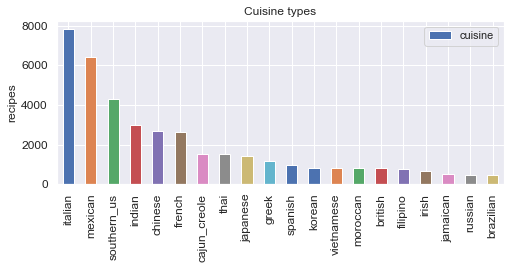

In [4]:
ax = train_df['cuisine'].value_counts().plot(kind='bar', title ="Cuisine types", figsize=(8, 3), legend=True, fontsize=12)
ax.set_ylabel("recipes", fontsize=12)
plt.show()

In [5]:
test=train_df[:10]
test.head(20)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [7]:
ls = ['lettuce', 'pepper', 'oil', 'sugar', 'chilli', 'chicken', 'pork', 'olives', 'salt']

for a in range(len(ls)): 
    for i in range(len(test.ingredients)): 
        for j in range(len(test.ingredients[i])): 
            if ls[a] in test.ingredients[i][j]:
                test.ingredients[i][j] = ls[a]
test.head(10)        

,cuisine,id,ingredients
0,greek,10259,"[lettuce, olives, grape tomatoes, garlic, pepp..."
1,southern_us,25693,"[plain flour, pepper, salt, tomatoes, pepper, ..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, oil, green chi..."
3,indian,22213,"[water, oil, wheat, salt]"
4,indian,13162,"[pepper, shallots, cornflour, pepper, onions, ..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[oil, salt, medium shrimp, pepper, garlic, cho..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[oil, purple onion, fresh pineapple, pork, pep..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, oil, s..."
